# Tensorflow
date: March 12th, 2017 <br>
by xiang

## 1. Tensorflow basic framework
## 1. 1 Simple example

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# tensorflow中很能认 float 32
# create data
x_data = np.random.rand(100).astype(np.float32)     # 0. 初始准备工作，100个(x, y) couple，定义上帝函数关系
y_data = x_data*0.1 + 0.3

### create tf structure start ###
Weights =  tf.Variable(tf.random_uniform([1], -1.0, 1.0))    # 0.1 构造 Weights, biases, 数据起源之一
biases = tf.Variable(tf.zeros([1]))     # [1] 代表啥？

y = Weights*x_data + biases

loss = tf.reduce_mean(tf.square(y-y_data))                 #  1. 定义loss function
optimizer = tf.train.GradientDescentOptimizer(0.5) #  2. 定义最优化方法 0.5 is learning rate
train = optimizer.minimize(loss)                                     # 3. 把 train 和 optimizer, 趋向， loss func 联系起来

init = tf.global_variables_initializer()                               # 4. 初始化 各种参数
### create tf structure end ###

sess = tf.Session()                                                             # 5. 定义 tf.Session()
sess.run(init)                                                                      # 6.  激活   Very important

for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, 'Weight: ', sess.run(Weights)[0], 'biases: ', sess.run(biases)[0])



(0, 'Weight: ', -0.068702161, 'biases: ', 0.52432108)
(20, 'Weight: ', 0.038427848, 'biases: ', 0.3320089)
(40, 'Weight: ', 0.083121628, 'biases: ', 0.30877438)
(60, 'Weight: ', 0.095373228, 'biases: ', 0.30240527)
(80, 'Weight: ', 0.098731697, 'biases: ', 0.30065936)
(100, 'Weight: ', 0.099652313, 'biases: ', 0.30018076)
(120, 'Weight: ', 0.099904686, 'biases: ', 0.30004957)
(140, 'Weight: ', 0.099973872, 'biases: ', 0.3000136)
(160, 'Weight: ', 0.099992819, 'biases: ', 0.30000374)
(180, 'Weight: ', 0.09999802, 'biases: ', 0.30000103)
(200, 'Weight: ', 0.099999458, 'biases: ', 0.30000028)


## 1. 2 Session control
Session 的打开模式

In [2]:
import tensorflow as tf
import numpy as np

matrix1 = tf.constant([[3, 3]])      #一行两列
matrix2 = tf.constant([[2],            # 二行一列
                                          [2]])

# matrix multiply np.dot(m1, m2)
product = tf.matmul(matrix1, matrix2)   

#####    method 1   #####
sess = tf.Session()

# 每run一次， tensorflow就执行一次结构
result  = sess.run(product) 

print(result)
sess.close()
#####################

##### method 2 #########
with tf.Session() as sess:      # 运行完，自己关sess
    result2 = sess.run(product)
    print(result2)



[[12]]
[[12]]


## 1.3 Variable
程序中如果定义了 <font color = red>**Variable**</font> ，一定要有： <br>
```python
init  = tf.global_variables_initializer() 

# 并在 定义好的 sess 中，执行一次：
sess.run(init)
```

In [3]:
import tensorflow as tf

state = tf.Variable(0, name = 'counter')   # 初值 0， 变量名字 counter
# print(state.name)
one = tf.constant(1)   # 常量

new_value = tf.add(state, one)
update = tf.assign(state, new_value)

# 如果定义了tf的变量，那么一定要有下面的initialize
init  = tf.global_variables_initializer()  # must have if define variables

with tf.Session() as sess:
    sess.run(init)
    for _ in range(3):       # 执行3次 update 动作
        sess.run(update)
        print(sess.run(state))    # print(state) 木用

1
2
3


## 1.4 Placeholder 传入值
tf.placeholder(tf.float32) 的使用意味着：sess.run()的时候，需填入所需的值，并和下列的 feed_dict 绑定。 

In [4]:
import tensorflow as tf

# 2 行 2 列 的结构   tf.placeholder(tf.float32, [2, 2])

input1 = tf.placeholder(tf.float32)      # tf大部分只能处理 float32
input2 = tf.placeholder(tf.float32)

output = tf.mul(input1, input2)

# 运行时，才输入数据， 用到 placeholder
# 注意下面  dictionary 的形式
with tf.Session() as sess:
    print(sess.run(output, feed_dict = {input1:[7.], input2:[2.0]}))


[ 14.]


## 1.5 Activation function
https://www.tensorflow.org/api_guides/python/nn <br>
The activation ops provide different types of nonlinearities for use in neural networks. These include smooth nonlinearities (sigmoid, tanh, elu, softplus, and softsign), continuous but not everywhere differentiable functions (relu, relu6, crelu and relu_x), and random regularization (dropout).

## 2. Establish our first NN
## 2.1 def 添加层
假设有$X$有$m$个输入，隐层有$n$个神经元：
$X_{1\times m}W_{m\times n}+b_{1\times n}$ 结果为1行n列数据（每个元素再经过activation function后，就是含有n个神经元的某层的输出）

In [5]:
import tensorflow as tf

def add_layer(inputs, in_size, out_size, activation_function = None):
    # 定义有 in_size 行， out_size 列的 Weight 矩阵
    # biases = 1*out_size
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

## 2.2 Establish NN

In [6]:
import tensorflow as tf
import numpy as np

# 我们在下列 code 中做了个定义，既，当 activation_function = None, 则激励函数是 f(x) = x
def add_layer(inputs, in_size, out_size, activation_function = None):
    # 定义有 in_size 行， out_size 列的 Weight 矩阵
    # biases = 1*out_size
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

####  自己造的数据 ####
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]       #  (300, 1)
noise = np.random.normal(0, 0.05, x_data.shape) # mean, std, shape
y_data = np.square(x_data) - 0.5 + noise
###################

# None 表示无论给多少个sample都可以, 1表示每个instance的维度=1
xs = tf.placeholder(tf.float32, [None, 1])     
ys = tf.placeholder(tf.float32, [None, 1])

#### 想建一个 3层 NN ####
# input layer 1 个， hiden layer 10 个， output layer 1 个
# 这个例子与textbook的NN例子不同：
# textbook中输出层，隐藏层的activation_function是相同的，
# 一般为sigmoid
l1 = add_layer(xs, 1, 10, activation_function = tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function = None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), 
                    reduction_indices = [1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# important step
init = tf.global_variables_initializer()    # 初始所有的变量
sess = tf.Session()
sess.run(init)     # 到sess.run 才运行

for i in range(1000):
    # training
    
    # 这次， 我们用全部的数据 x_data 进行 training
    # 也可指定用部分数据进行training
    sess.run(train_step, feed_dict = {xs : x_data, ys : y_data})
    if i % 50 == 0:
        # 只要涉及到 placeholder 的东西，都需要 feed_dict
        print(sess.run(loss, feed_dict = {xs : x_data, ys : y_data}))

# 问题：  1. 咋看最后的模型参数，既 Weights   and    biases
#                2. 上面代码 reduction_indices = [1] 是个什么鬼？

0.722768
0.018376
0.00959883
0.00606999
0.00461111
0.00402102
0.00371359
0.00353213
0.00340656
0.00330776
0.00321338
0.00314122
0.00306944
0.00300873
0.00295722
0.00290934
0.00286256
0.00281996
0.00277654
0.00273606


In [7]:
x_data.shape

(300, 1)

<font color = red>上面代码 reduction_indices = [1] 是个什么鬼？表按哪个维度reduction, 解释如下：</font><br>
解释材料来源： https://www.zhihu.com/question/51325408?from=profile_question_card

In [8]:
import tensorflow as tf
x = [[1,1,1],
        [1,1,1]]
sess = tf.Session()
sess.run(tf.reduce_sum(x))

6

In [9]:
sess.run(tf.reduce_sum(x, 0))

array([2, 2, 2], dtype=int32)

In [10]:
sess.run(tf.reduce_sum(x, 1))

array([3, 3], dtype=int32)

***CAUSION***: 下面的例子， <font color = red>[]里始终表达的是x的维度, 而不是上面例子的结果[3, 3]的维度</font>。

In [11]:
sess.run(tf.reduce_sum(x, [1, 0]))     # []里始终表达的是x的维度

6

In [12]:
sess.run(tf.reduce_sum(x, [1, 1]))

array([3, 3], dtype=int32)

输出结果<font color = green>保持</font>了x的shape:

In [13]:
sess.run(tf.reduce_sum(x, 1, keep_dims = True)) 

array([[3],
       [3]], dtype=int32)

## 2.3 Results visualization

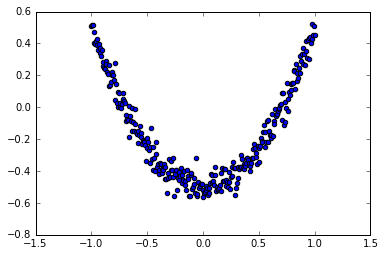

In [14]:
# This example do not work well in jupyter notebook, but in original
# python terminal, is ok.

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt      # <-------  new

# define a function named add_layer
def add_layer(inputs, in_size, out_size, activation_function = None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

# Make some data with noises
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]       
noise = np.random.normal(0, 0.05, x_data.shape) 
y_data = np.square(x_data) - 0.5 + noise

# add two placeholders reference with x_data and y_data in the future.
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

# add a hidden layer
l1 = add_layer(xs, 1, 10, activation_function = tf.nn.relu)

# add an output layer
prediction = add_layer(l1, 10, 1, activation_function = None)

# the error between prediction and real data
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), 
                    reduction_indices = [1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# important step
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# figure
fig = plt.figure()              # <----------- new
ax = fig.add_subplot(1, 1, 1)     # 一个画布内，图的位置控制
ax.scatter(x_data, y_data)
# plt.ion()      # work in python3.5
plt.show(block = False)
# plt.show()

for i in range(1000):
    # training
    sess.run(train_step, feed_dict = {xs : x_data, ys : y_data})
    if i % 50 == 0:
        # to see the step improvement
        # print(sess.run(loss, feed_dict = {xs : x_data, ys : y_data}))
        try:
            ax.lines.remove(lines[0])     # 
        except Exception:
            pass
        
        prediction_value = sess.run(prediction, feed_dict = {xs:x_data})
        # x_data是横坐标(这里是个向量)，pre_value是纵坐标（也是个向量）
        lines = ax.plot(x_data, prediction_value, 'r-', lw = 5)  
        
        plt.pause(0.1)    # to pause 0.1 sec
        

## 2.4 Optimizer
https://www.tensorflow.org/versions/master/api_docs/python/train/
<br>
* <font color = blue>tf.train.GradientDescentOptimizer</font> would change to SocasticGradientDecentOptimizer if we feed <font color = red>non-full-size training data</font> to a learner.
* Frequence used important optimizer: <font color = red>tf.train.MomentumOptimizer</font> considers the previous learning rate then to decide current learning rate value. Hence, this optimizer would faster than other else.
* Frequence used important optimizer: <font color = red>tf.train.AdamOptimizer</font>

## 3. Tensorboard (a nice visualization assitant)
## 3.1 Tensorboard1

In [16]:
"""
Please note, this code is only for python 3+. If you are using python 2+, please modify the code accordingly.
"""
from __future__ import print_function
import tensorflow as tf


def add_layer(inputs, in_size, out_size, activation_function=None):
    # add one more layer and return the output of this layer
    with tf.name_scope('layer'):
        with tf.name_scope('weights'):
            Weights = tf.Variable(tf.random_normal([in_size, out_size]), name='W')
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1, out_size]) + 0.1, name='b')
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.add(tf.matmul(inputs, Weights), biases)
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b, )
        return outputs


# define placeholder for inputs to network
with tf.name_scope('inputs'):
    xs = tf.placeholder(tf.float32, [None, 1], name='x_input')
    ys = tf.placeholder(tf.float32, [None, 1], name='y_input')

# add hidden layer
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l1, 10, 1, activation_function=None)

# the error between prediciton and real data
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                                        reduction_indices=[1]))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

sess = tf.Session()

# tf.train.SummaryWriter soon be deprecated, use following
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:  # tensorflow version < 0.12
    writer = tf.train.SummaryWriter('logs/', sess.graph) #把前面信息手机起来，放到这个graph里
else: # tensorflow version >= 0.12
    writer = tf.summary.FileWriter("logs/", sess.graph)

# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess.run(init)

# direct to the local dir and run this in terminal:
# $ tensorboard --logdir=logs

# 进入logs上一层目录，运行 tensorboard --logdir=logs
# 赋值网址到浏览器


## 3.2 Tensorboard 2
暂时先不弄

## 4 
## 4.1 Classification

In [16]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# number 1 to 10 data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

def add_layer(inputs, in_size, out_size, activation_function=None,):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1,)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b,)
    return outputs

def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys})
    return result

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 784]) # 28x28
ys = tf.placeholder(tf.float32, [None, 10])

# add output layer, 就1层，木 hidden layer
prediction = add_layer(xs, 784, 10,  activation_function=tf.nn.softmax)

# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))       # loss
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.Session()
# important step
# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess.run(init)

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys})
    if i % 50 == 0:
         # 用 test data 测试模型accuracy
        print(compute_accuracy(
mnist.test.images, mnist.test.labels))
        
#  mnist.test.images.shape --> (10000, 784)
#  mnist.test.labels.shape --> (10000, 10)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0.1109
0.6405
0.7391
0.7822
0.8002
0.8219
0.8314
0.8364
0.8384
0.8478
0.854
0.8616
0.8645
0.8667
0.8652
0.8682
0.87
0.8724
0.8717
0.8754


In [15]:
mnist.test.labels.shape

(10000, 10)